In [16]:
import pandas as pd

In [17]:
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
rates = pd.read_csv("cleaned/rates.csv")

rates

,jurisdiction,slug,country,location,season,total,mealsAndIncidentals
0,Canada,albania-tirana,Albania,Tirana,NaN,42.38,nan
1,Canada,albania,Albania,Other,NaN,33.90,nan
2,Canada,algeria-algiers,Algeria,Algiers,NaN,134.44,nan
3,Canada,algeria,Algeria,Other,NaN,107.56,nan
4,Canada,angola-luanda,Angola,Luanda,NaN,262.80,nan
5,Canada,angola,Angola,Other,NaN,210.24,nan
6,Canada,anguilla-the-valley,Anguilla,The Valley,NaN,174.44,nan
7,Canada,antigua-and-barbuda-st.-john's,Antigua and Barbuda,St. John's,NaN,226.45,nan
8,Canada,argentina-buenos-aires,Argentina,Buenos Aires,NaN,95.03,nan
9,Canada,argentina,Argentina,Other,NaN,76.02,nan


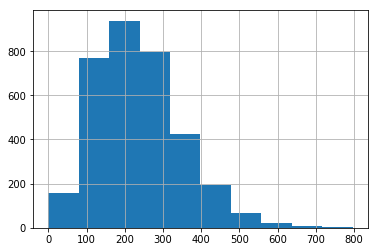

In [19]:
rates['total'].hist()

In [20]:
capitals = pd.read_csv("cleaned/capitals.csv")

capitals

,Short-form name,Long-form name,GENC 2A Code (see Note 2),GENC 3A Code (see Note 2),Capital,slug
0,Afghanistan *+,Islamic Republic of Afghanistan,AF,AFG,Kabul,afghanistan-kabul
1,Albania *+,Republic of Albania,AL,ALB,Tirana,albania-tirana
2,Algeria *+,People's Democratic Republic of Algeria,DZ,DZA,Algiers,algeria-algiers
3,Andorra *+,Principality of Andorra,AD,AND,Andorra la Vella,andorra-andorra-la-vella
4,Angola *+,Republic of Angola,AO,AGO,Luanda,angola-luanda
5,Antigua and\nBarbuda *+,Antigua and Barbuda,AG,ATG,Saint John's,antigua-and-barbuda-saint-john's
6,Argentina *+,Argentine Republic,AR,ARG,Buenos Aires,argentina-buenos-aires
7,Armenia *+,Republic of Armenia,AM,ARM,Yerevan,armenia-yerevan
8,Australia *+,Commonwealth of Australia,AU,AUS,Canberra,australia-canberra
9,Austria *+,Republic of Austria,AT,AUT,Vienna,austria-vienna


In [21]:
us_rates = rates[rates['jurisdiction'] == 'US'].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

eu_rates = rates[rates['jurisdiction'] == 'EU'].copy()

other_rates = rates[~rates['jurisdiction'].isin(['US','EU'])].copy()

us_vs_other_rates = us_rates.merge(other_rates, on='slug', how='inner').reset_index()

eu_rates['country'] = eu_rates['country'].str.upper()

us_vs_eu_rates = us_rates.merge(eu_rates, on='country', how='inner').reset_index()

us_vs_other_rates = pd.concat([us_vs_other_rates,us_vs_eu_rates], ignore_index=True, sort=False)

us_vs_other_rates

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y,slug_x,country,slug_y
0,0,0,US,afghanistan-kabul,AFGHANISTAN,Kabul,S1,33.00,33.00,UK,AFGHANISTAN,Kabul,NaN,125.50,nan,NaN,NaN,NaN
1,1,0,US,afghanistan-kabul,AFGHANISTAN,Kabul,S1,33.00,33.00,UN,Afghanistan,Kabul,NaN,162.00,nan,NaN,NaN,NaN
2,2,0,US,afghanistan-kabul,AFGHANISTAN,Kabul,S1,33.00,33.00,UN,Afghanistan,Kabul (Kabul Serena),NaN,290.00,nan,NaN,NaN,NaN
3,3,1,US,albania-tirana,ALBANIA,Tirana,S1,285.00,95.00,Canada,Albania,Tirana,NaN,42.38,nan,NaN,NaN,NaN
4,4,1,US,albania-tirana,ALBANIA,Tirana,S1,285.00,95.00,UK,ALBANIA,Tirana,NaN,223.89,nan,NaN,NaN,NaN
5,5,1,US,albania-tirana,ALBANIA,Tirana,S1,285.00,95.00,UN,Albania,Tirana,NaN,147.00,nan,NaN,NaN,NaN
6,6,1,US,albania-tirana,ALBANIA,Tirana,S1,285.00,95.00,UN,Albania,Tirana (Rogner),NaN,165.00,nan,NaN,NaN,NaN
7,7,1,US,albania-tirana,ALBANIA,Tirana,S1,285.00,95.00,UN,Albania,Tirana (Sheraton),NaN,193.00,nan,NaN,NaN,NaN
8,8,2,US,algeria-algiers,ALGERIA,Algiers,S1,255.00,75.00,Canada,Algeria,Algiers,NaN,134.44,nan,NaN,NaN,NaN
9,9,2,US,algeria-algiers,ALGERIA,Algiers,S1,255.00,75.00,UK,ALGERIA,Algiers,NaN,286.55,nan,NaN,NaN,NaN


In [22]:
us_vs_other_rates['diff'] = (us_vs_other_rates['total_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_x']

us_vs_other_rates.loc[us_vs_other_rates['jurisdiction_y'] == 'Canada','diff'] = (us_vs_other_rates['mealsAndIncidentals_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['mealsAndIncidentals_x']


In [23]:
us_vs_other_rates['diff'].describe()

count   605.00
mean     -0.19
std       2.37
min     -39.55
25%      -0.12
50%       0.10
75%       0.26
max       1.00
Name: diff, dtype: float64

In [24]:
us_vs_other_rates[us_vs_other_rates['diff'] < -10]

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y,slug_x,country,slug_y,diff
204,204,65,US,iraq-baghdad,IRAQ,Baghdad,S1,11.00,11.00,UN,Iraq,Baghdad,NaN,275.00,nan,NaN,NaN,NaN,-24.00
205,205,65,US,iraq-baghdad,IRAQ,Baghdad,S1,11.00,11.00,UN,Iraq,Baghdad (Al Rasheed Hotel),NaN,446.00,nan,NaN,NaN,NaN,-39.55
253,253,81,US,libya-tripoli,LIBYA,Tripoli,S1,21.00,21.00,UN,Libya,"Tripoli (Albustan, Corinthia, Radisson Blu)",NaN,335.00,nan,NaN,NaN,NaN,-14.95
531,60,65,US,NaN,NaN,Baghdad,S1,11.00,11.00,EU,NaN,NaN,NaN,303.31,nan,iraq-baghdad,IRAQ,iraq,-26.57


In [25]:
us_vs_other_rates[us_vs_other_rates['diff'] > 0.9]

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y,slug_x,country,slug_y,diff
407,407,130,US,syria-damascus,SYRIA,Damascus,S1,344.00,108.00,Canada,Syria,Damascus,NaN,0.03,nan,NaN,NaN,NaN,1.00
458,458,146,US,venezuela-caracas,VENEZUELA,Caracas,S1,575.00,261.00,UK,VENEZUELA,Caracas,NaN,0.06,nan,NaN,NaN,NaN,1.00


In [26]:
us_vs_other_rates.loc[us_vs_other_rates['slug'].isnull(),'slug'] = us_vs_other_rates['slug_y']

min_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].min()).reset_index()

min_diff.groupby('jurisdiction_y').describe()

diff                                        
                count  mean  std    min   25%   50%  75%  max
jurisdiction_y                                               
Canada         131.00 -0.12 0.58  -5.77 -0.27 -0.06 0.10 1.00
EU             132.00 -0.15 2.41 -26.57 -0.00  0.13 0.26 0.72
UK             115.00  0.19 0.36  -2.80  0.10  0.22 0.34 1.00
UN             119.00 -0.58 3.94 -39.55 -0.25  0.05 0.21 0.75

In [27]:
max_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].max()).reset_index()

max_diff.groupby('jurisdiction_y').describe()

diff                                        
                count  mean  std    min   25%   50%  75%  max
jurisdiction_y                                               
Canada         131.00 -0.11 0.58  -5.77 -0.26 -0.06 0.10 1.00
EU             132.00 -0.15 2.41 -26.57  0.01  0.13 0.26 0.72
UK             115.00  0.19 0.36  -2.80  0.10  0.22 0.35 1.00
UN             119.00 -0.13 2.42 -24.00  0.04  0.18 0.37 0.79

In [28]:
us_vs_other_rates.sample(n=3)

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y,slug_x,country,slug_y,diff
321,321,102,US,oman-muscat,OMAN,Muscat,S1,416.00,155.00,Canada,Oman,Muscat,NaN,152.21,nan,NaN,NaN,NaN,0.02
479,8,8,US,azerbaijan,NaN,Baku,S1,361.00,115.00,EU,NaN,NaN,NaN,341.81,nan,azerbaijan-baku,AZERBAIJAN,azerbaijan,0.05
286,286,92,US,montenegro-podgorica,MONTENEGRO,Podgorica,S1,299.00,88.00,UN,Montenegro,Podgorica,NaN,164.00,nan,NaN,NaN,NaN,0.45


In [29]:
us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada'].sample(n=1)

,level_0,index,jurisdiction_x,slug,country_x,location_x,season_x,total_x,mealsAndIncidentals_x,jurisdiction_y,country_y,location_y,season_y,total_y,mealsAndIncidentals_y,slug_x,country,slug_y,diff
60,60,19,US,bulgaria-sofia,BULGARIA,Sofia,S1,276.00,103.00,Canada,Bulgaria,Sofia,NaN,87.69,nan,NaN,NaN,NaN,0.15


In [30]:
us_vs_other_rates.to_csv('results.csv')